In [259]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Visualization data

In [260]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
#info()查看dataframe的基本信息
#训练集1460个数据，除去ID和预测价格一共79个特征，38个数值型，43个非数值型，所有特征均为非空
#19个特征含有空值
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [261]:
#查看数值型特征的详细分析
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [262]:
train_ID = train_data['Id']
train_data.drop("Id", axis=1, inplace=True)
test_ID = test_data['Id']
test_data.drop("Id", axis=1, inplace=True)

Text(0,0.5,'SalePrice')

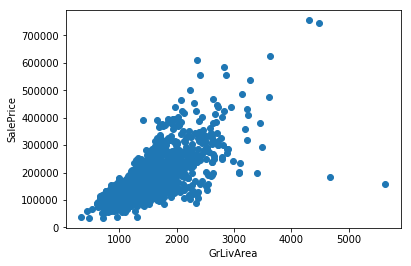

In [263]:
#地上房屋面积与房价的关系
plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

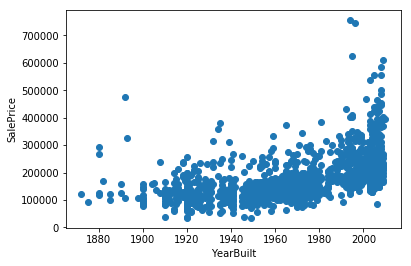

In [264]:
#从地上房屋面积看出存在两个面积很大但是价格很低的异常点，删除
train_data.drop(train_data[(train_data['GrLivArea']>=4000) & (train_data['SalePrice']<=200000)].index, inplace=True)
#修建时间与房价关系
plt.scatter(x=train_data['YearBuilt'], y=train_data['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

# Data Cleaning

In [265]:
#从上面的可视化可以看出随着房屋的面积增大和建筑时间的靠近房屋的价格呈上升趋势
#基本了解一定的趋势之后，对于给定的训练集中的缺失值进行处理
#将训练集与测试集混合在一起补充缺失值
data_all = pd.concat([train_data, test_data])
data_all.shape
SalePrice = train_data['SalePrice']
data_all.drop(['SalePrice'], axis=1, inplace=True)

In [266]:
#检查缺失值
data_null = data_all.isnull().sum()
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)#ascending是否降序，默认为True
data_null

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

In [267]:
#房屋是否有额外的设施
#'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'中的NA都表示不存在该设施，用None表示
feature_facility = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
#利用dataframe的fillna方法填充缺失值
#这里的data_all没有inplace为False，所以需要赋值，inplace为True可以直接通过fillna方法在原dataframe上修改
for feature in feature_facility:
    data_all[feature] = data_all[feature].fillna('None')

# data_all['PoolQC'].isnull().sum()

In [268]:
#Garage系列属性四个obj,三个数值型
#obj属性填写None
feature_Garage_obj = ['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']
for feature in feature_Garage_obj:
    data_all[feature] = data_all[feature].fillna('None')

#数值型填写0
feature_Garage_num = ['GarageYrBlt', 'GarageCars', 'GarageArea']
for feature in feature_Garage_num:
    data_all[feature] = data_all[feature].fillna(0)

In [269]:
#Bsmt(basement)地下室系列属性
#五个obj，五个数值型。obj用None，数值型用0
feature_bsmt_obj = ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']
for feature in feature_bsmt_obj:
    data_all[feature] = data_all[feature].fillna('None')
    
feature_bsmt_num = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'TotalBsmtSF']
for feature in feature_bsmt_num:
    data_all[feature] = data_all[feature].fillna(0)

In [270]:
#MasVnrType obj MasVnrArea num
data_all['MasVnrType'] = data_all['MasVnrType'].fillna('None')
data_all['MasVnrArea'] = data_all['MasVnrArea'].fillna(0)

In [271]:
#这几个特征使用众数填充dataframe.mode()
#这里的众数也可使是非数值类型
features_others = ['MSZoning', 'SaleType', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'Electrical']
for feature in features_others:
    data_all[feature] = data_all[feature].fillna(data_all[feature].mode()[0])

data_all = data_all.drop('Utilities', axis=1)

data_all['Functional'] = data_all['Functional'].fillna('Typ')

In [272]:
#'LotFrontage'是数值型
#中位数补充（待学习）
data_all['LotFrontage'] = data_all.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [273]:
#删除了ID，SalePrice，Utilities
data_all.shape

(2917, 78)

In [274]:
#查看特征每一类别的数量
print(data_all['KitchenQual'].value_counts())

TA    1493
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64


# Feature Engineering

In [277]:
#将所有的数据缺失值补充之后完成数据清洗，接下来进行特征工程
#1、将特征的字符串转换成数值型，以便后面拟合模型
#2、不同的特征之间进行一定的组合
#给定数据中的特征很多都是分层次的，可以利用sklearn中的LabelEncoder对分类型特征编码
#来为特征分配一个0-n_classes-1的标签
from sklearn.preprocessing import LabelEncoder
data_all['MSSubClass'] = data_all['MSSubClass'].apply(str)
data_all['OverallCond'] = data_all['OverallCond'].astype(str)
data_all['YrSold'] = data_all['YrSold'].astype(str)
data_all['MoSold'] = data_all['MoSold'].astype(str)

features = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold']

for feature in features:
    print(data_all[feature].value_counts())
    Le = LabelEncoder()
    Le.fit(data_all[feature].values)
    data_all[feature] = Le.transform(data_all[feature].values)

None    1420
Gd       742
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64
TA      1283
Gd      1209
Ex       256
Fa        88
None      81
Name: BsmtQual, dtype: int64
TA      2604
Gd       122
Fa       104
None      82
Po         5
Name: BsmtCond, dtype: int64
TA      2602
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64
TA      2652
None     159
Fa        74
Gd        15
Po        14
Ex         3
Name: GarageCond, dtype: int64
TA    1798
Gd     979
Ex     105
Fa      35
Name: ExterQual, dtype: int64
TA    2536
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
Ex    1491
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64
None    2908
Ex         4
Gd         3
Fa         2
Name: PoolQC, dtype: int64
TA    1493
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64
Unf     851
GLQ     847
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     79
N

In [278]:
#查看LabelEncoder转换结果是否正确 
for feature in features:
    print(data_all[feature].max())

5
4
4
5
5
3
4
4
3
3
6
6
6
4
4
3
2
3
2
1
2
1
15
8
4
11


In [280]:
from scipy.stats import skew
data_all['TotalSF'] = data_all['TotalBsmtSF'] + data_all['1stFlrSF'] + data_all['2ndFlrSF']
numeric_feats = data_all.dtypes[data_all.dtypes != "object"].index

# 检查所有数值型变量的偏态
skewed_feats = data_all[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [281]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data_all[feat] = boxcox1p(data_all[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [282]:
data_all = pd.get_dummies(data_all)

In [283]:
data_all.shape

(2917, 220)

In [284]:
n_train = len(train_data)
train_data_transfer = data_all[:n_train]
test_data_transfer = data_all[n_train:]

In [285]:
print(train_data.shape, test_data.shape)
print(train_data_transfer.shape, test_data_transfer.shape)

(1458, 80) (1459, 79)
(1458, 220) (1459, 220)


# 模型训练

In [286]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC #线性回归模型
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #集成模型
from sklearn.model_selection import KFold, cross_val_score, train_test_split #交叉验证
from sklearn.metrics import mean_squared_error #均方误差
import xgboost as xgb #XGBoost
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

#交叉验证均方根误差
def rmse_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42).get_n_splits()
    rmse= np.sqrt(-cross_val_score(model, train_data_transfer.values, SalePrice.values, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)
    

In [248]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [258]:
score = rmse_cv(lasso)
score

array([28616.90058083, 28735.42331378, 32636.85231732, 28505.08715417,
       35639.7448501 ])